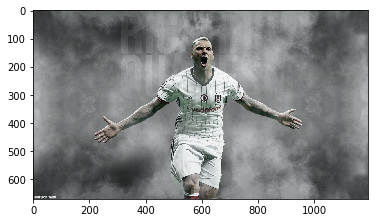

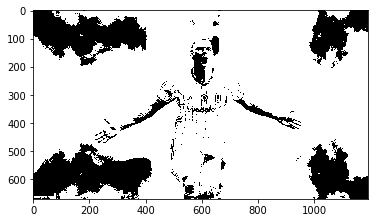

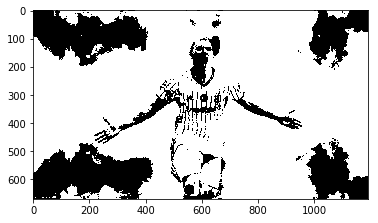

In [16]:
import numpy as np
import matplotlib.pyplot as plt

def rgbToBW(img, threshold = 90):
    bw = np.zeros((img.shape[0], img.shape[1]))
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            if(sum(img[i,j,:])/3 > threshold):
                bw[i,j] = 0
            else:
                bw[i,j] = 1
    return bw

def defineMask():
    mask = [[1,1,1],[1,1,1],[1,1,1]]
    return mask

def myDilation(img, mask):
    m = img.shape[0]
    n = img.shape[1]
    img2 = np.zeros((img.shape[0], img.shape[1]))
    for i in range(1,m-1):
        for j in range(1,n-1):
            x1 = img[i,j] and mask[1][1]  #center

            x2 = img[i-1,j-1] and mask[0][0] #scan
            x3 = img[i-1,j] and mask[0][1]
            x4 = img[i-1,j+1] and mask[0][2]

            x5 = img[i,j-1] and mask[1][0]
            x6 = img[i,j+1] and mask[1][2]

            x7 = img[i+1,j-1] and mask[2][0]
            x8 = img[i+1,j] and mask[2][1]
            x9 = img[i+1,j+1] and mask[2][2]

            result = x1 or x2 or x3 or x4 or x5 or x6 or x7 or x8 or x9

            img2[i,j] = result

    return img2


test = plt.imread("test.jpg")
bw = rgbToBW(test)

dilated = myDilation(bw,defineMask()) # dilated image

plt.imshow(test) #default image
plt.show()

plt.imshow(bw, plt.cm.binary) #bw image
plt.show()

plt.imshow(dilated, plt.cm.binary) #dilated image
plt.show()